## Import the relevant lib 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf

## Data generation

In [2]:
observations = 1000
# np.random.uniform(low, high, size) draws a random value from the interval (low,high), where each number has an equal chance to be selected
x = np.random.uniform(-10,10, (observations,1))
z = np.random.uniform(-10,10, (observations,1))

generated_inputs = np.column_stack((x,z)) # np.column_stack() takes a sequence of 1D arrays and stacks them into a single 2D array
noise = np.random.uniform(-1,1, (observations,1))

generated_targets = 2*x - 3*z + 5 +noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


## Solving  with TF

In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                          kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                          bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                          )
])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate = 0.02)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs= 100, verbose= 1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 29.1873
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1139
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4929
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3993 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3766
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4345
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4123
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3765
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.3789
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3824
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3879
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3685
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3927
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3782
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3818


## Extracting the weights and bias

In [5]:
model.layers[0].get_weights()

[array([[ 1.9214618],
        [-3.0414872]], dtype=float32),
 array([5.021232], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()
weights

[array([[ 1.9214618],
        [-3.0414872]], dtype=float32),
 array([5.021232], dtype=float32)]

In [7]:
bias = model.layers[0].get_weights()[1]
bias

array([5.021232], dtype=float32)

## Extract the outputs (make predictions)

In [8]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[  9.6],
       [-14.5],
       [ 39.6],
       [  7.7],
       [-13.8],
       [ 22.2],
       [ -6.3],
       [ 19.3],
       [ -1.7],
       [ 22.2],
       [  8.1],
       [ -6.2],
       [ -3.6],
       [-19.7],
       [ 18.3],
       [ 10.1],
       [-15.1],
       [ 28.7],
       [ 15.5],
       [-19.7],
       [ 37.7],
       [  6.6],
       [  2.4],
       [  2.3],
       [ -3.3],
       [ -4.3],
       [ 20.8],
       [ 31.8],
       [ 29.3],
       [-29.8],
       [ 35.2],
       [ 34.6],
       [ 25.5],
       [ 26.9],
       [ 33.3],
       [-30.7],
       [-15.4],
       [  0.4],
       [  7.9],
       [ 20.3],
       [ 18.1],
       [ 11.8],
       [ 45. ],
       [  4.3],
       [ 17.5],
       [-24.8],
       [-33.1],
       [  8.8],
       [-18.5],
       [  9.9],
       [ 21.1],
       [  8.3],
       [ 10. ],
       [-22.6],
       [ -6.7],
       [ 28.1],
       [ -6.6],
       [ 17.6],
       [  2.4],
       [  3.7],
       [-10.6],
       [ 19.3],
       [

In [9]:
training_data['targets'].round(1)

array([[  8.7],
       [-14.7],
       [ 38.7],
       [  8.5],
       [-13. ],
       [ 21.7],
       [ -5.8],
       [ 19.2],
       [ -2.7],
       [ 22.2],
       [  9. ],
       [ -5.3],
       [ -3.6],
       [-20.1],
       [ 19.1],
       [  9. ],
       [-14.1],
       [ 28.9],
       [ 14.9],
       [-20.6],
       [ 37.8],
       [  6. ],
       [  2. ],
       [  2.1],
       [ -3. ],
       [ -3.7],
       [ 19.8],
       [ 32.2],
       [ 30.5],
       [-29.9],
       [ 35.3],
       [ 33.6],
       [ 26.2],
       [ 28. ],
       [ 33.2],
       [-31.4],
       [-15.2],
       [ -0. ],
       [  8.1],
       [ 19.3],
       [ 19.1],
       [ 12.9],
       [ 45.7],
       [  4.1],
       [ 18.8],
       [-24.1],
       [-32.5],
       [  9. ],
       [-18.8],
       [  8.4],
       [ 21.7],
       [  8.6],
       [  9.5],
       [-21.4],
       [ -7.4],
       [ 28.7],
       [ -7.4],
       [ 17.3],
       [  1.9],
       [  4.2],
       [-10.1],
       [ 18.5],
       [

## Plotting the data

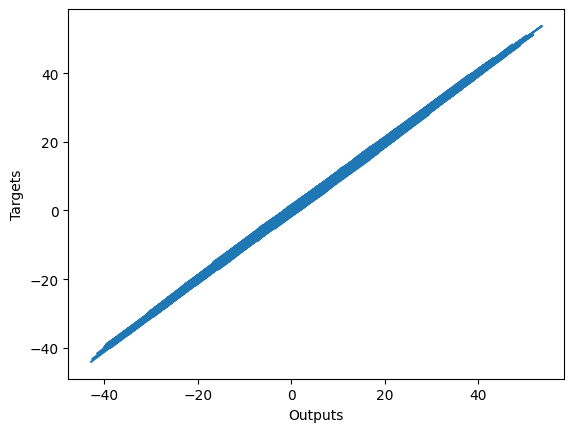

In [10]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()
